In [295]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogecoin-historical-dataset/doge-usd-max.csv


In [296]:
test_data = pd.read_csv('/kaggle/input/dogecoin-historical-dataset/doge-usd-max.csv')
test_data

,snapped_at,price,market_cap,total_volume
0,2013-12-15 00:00:00 UTC,0.000559,3.488670e+06,0.000000e+00
1,2013-12-17 00:00:00 UTC,0.000218,1.619159e+06,0.000000e+00
2,2013-12-18 00:00:00 UTC,0.000268,2.191987e+06,0.000000e+00
3,2013-12-19 00:00:00 UTC,0.000475,4.299422e+06,0.000000e+00
4,2013-12-20 00:00:00 UTC,0.000989,9.866232e+06,0.000000e+00
...,...,...,...,...
2699,2021-05-09 00:00:00 UTC,0.633615,8.206402e+10,2.941837e+10
2700,2021-05-10 00:00:00 UTC,0.573136,7.436812e+10,4.905329e+10
2701,2021-05-11 00:00:00 UTC,0.451129,5.844156e+10,1.720036e+10
2702,2021-05-12 00:00:00 UTC,0.496731,6.435597e+10,1.529008e+10


In [297]:
pd.core.frame.DataFrame

pandas.core.frame.DataFrame

<AxesSubplot:>

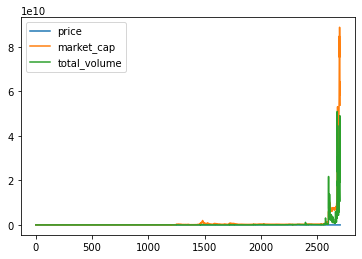

In [298]:
test_data.plot.line()

In [299]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 

In [300]:
# test_data.set_index('snapped_at', inplace=True)

In [301]:
test_data

,snapped_at,price,market_cap,total_volume
0,2013-12-15 00:00:00 UTC,0.000559,3.488670e+06,0.000000e+00
1,2013-12-17 00:00:00 UTC,0.000218,1.619159e+06,0.000000e+00
2,2013-12-18 00:00:00 UTC,0.000268,2.191987e+06,0.000000e+00
3,2013-12-19 00:00:00 UTC,0.000475,4.299422e+06,0.000000e+00
4,2013-12-20 00:00:00 UTC,0.000989,9.866232e+06,0.000000e+00
...,...,...,...,...
2699,2021-05-09 00:00:00 UTC,0.633615,8.206402e+10,2.941837e+10
2700,2021-05-10 00:00:00 UTC,0.573136,7.436812e+10,4.905329e+10
2701,2021-05-11 00:00:00 UTC,0.451129,5.844156e+10,1.720036e+10
2702,2021-05-12 00:00:00 UTC,0.496731,6.435597e+10,1.529008e+10


In [302]:
test_data_11 = test_data.drop(['market_cap','snapped_at' ,'total_volume'], axis=1)
test_data_11

test_data_22 = test_data_11[2600:2703]
test_data_22.append(test_data_22,ignore_index = True)

test_data_22.reset_index().rename(columns={"index":"id"})
test_data_33 = test_data_22.rename_axis('id').reset_index()
test_data_22.index.name='id'
test_data_44 = test_data_22.reset_index()
test_data_44
test_data_22 = test_data_44

## 여기부터 

In [303]:
from statsmodels.formula.api import ols

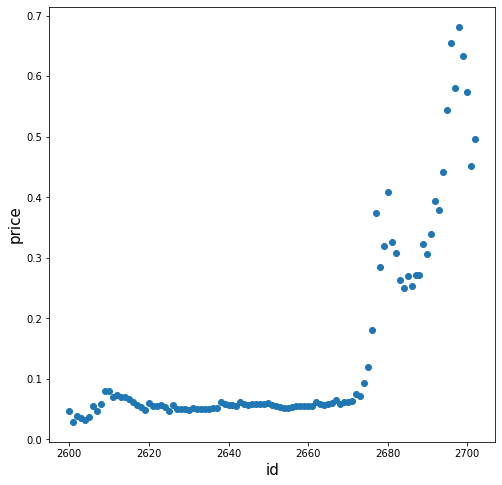

In [304]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(test_data_22['id'],test_data_22['price']) ## 원 데이터 산포도
 
plt.xlabel('id', fontsize=font_size)
plt.ylabel('price',fontsize=font_size)
plt.show()

In [312]:
print(fit.params.Intercept) ## 절편
print(fit.params.id) 

-10.71523862893509
0.004096690196650171


In [305]:
fit = ols('price ~ id',data=test_data_22).fit()
fit.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f4667aa30d0>>

In [306]:
print(fit.params.Intercept) ## 절편
print(fit.params.id)

-10.71523862893509
0.004096690196650171


In [307]:
fit.fittedvalues

0     -0.063844
1     -0.059747
2     -0.055651
3     -0.051554
4     -0.047457
         ...   
98     0.337632
99     0.341728
100    0.345825
101    0.349922
102    0.354018
Length: 103, dtype: float64

In [308]:
fit.resid


0      0.111195
1      0.088265
2      0.093640
3      0.086140
4      0.079081
         ...   
98     0.344210
99     0.291887
100    0.227311
101    0.101207
102    0.142713
Length: 103, dtype: float64

In [311]:
fit.predict(exog=dict(id=[2500]))


0   -0.473513
dtype: float64

In [310]:
# https://tjansry354.tistory.com/12

from sklearn.linear_model import LinearRegression


X = test_data_22['id']
y = test_data_22['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

lr = LinearRegression().fit(X_train,y_train)

# lr.score(X_train, y_train)

# lr.coef_

# lr.intercept_



ValueError: Expected 2D array, got 1D array instead:
array=[2614 2678 2700 2685 2663 2658 2692 2667 2606 2647 2620 2701 2633 2643
 2681 2601 2607 2624 2694 2665 2603 2621 2626 2644 2642 2623 2690 2683
 2696 2688 2676 2641 2600 2636 2629 2611 2682 2697 2627 2651 2625 2691
 2699 2617 2645 2670 2612 2654 2668 2649 2632 2669 2660 2655 2657 2635
 2653 2695 2604 2673 2675 2609 2671 2687 2680 2615 2639 2650 2686 2610
 2605 2634 2622 2656 2666 2631 2674 2652 2619 2640 2698 2693].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.